In [23]:
# 4.4
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from cobertura import abrangencia
import csv

csvPerfilComparecimentoAbstencao2020 = './dados/perfil_comparecimento_abstencao_2020.csv'
dataPerfilComparecimentoAbstencao2020 = pd.read_csv(csvPerfilComparecimentoAbstencao2020, sep= ';', encoding='ISO-8859-1')


Cidade TAUBATÉ teve eleição de 2º turno


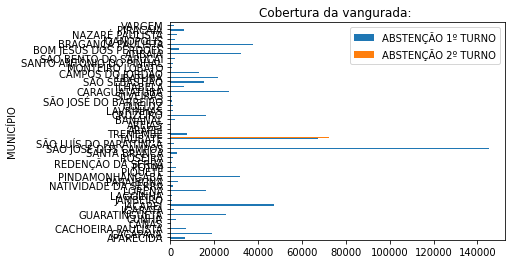

In [120]:
def createQuery(list):
        count = 0
        query = ""

        for abr_code in list:
                query += 'CD_MUNICIPIO == ' + str(abr_code["codigo"])
                count += 1
                if count < len(list):
                        query += ' or '
        return query

query = createQuery(abrangencia)
dfAbstencaoEleicao2020 = pd.DataFrame(data = dataPerfilComparecimentoAbstencao2020.query(query), columns=['CD_MUNICIPIO', 'NR_TURNO', 'QT_ABSTENCAO', 'QT_COMPARECIMENTO'])

def generateChart(list, label, filename, chart): 
        listResults = []
        for abr_code in list:
                filtroCidade = pd.DataFrame(data = dfAbstencaoEleicao2020.query('CD_MUNICIPIO == ' + str(abr_code["codigo"])))
                filtroTurno1 = filtroCidade.query('NR_TURNO == 1')
                filtroTurno2 = filtroCidade.query('NR_TURNO == 2')

                comp_turno_1 = filtroTurno1.QT_COMPARECIMENTO.sum()
                abs_turno_1 = filtroTurno1.QT_ABSTENCAO.sum()

                totalEleitores = comp_turno_1 + abs_turno_1

                comp_turno_2 = filtroTurno2.QT_COMPARECIMENTO.sum()
                abs_turno_2 = filtroTurno2.QT_ABSTENCAO.sum()

                perc_abs_1_turno = round(((abs_turno_1 * 100) / totalEleitores), 2)
                perc_abs_2_turno = round(((abs_turno_2 * 100) / totalEleitores), 2)

                if(comp_turno_2 > 0) : print('Cidade ' + abr_code["cidade"] + ' teve eleição de 2º turno')
                dft = pd.DataFrame({"REGIÃO":abr_code["regiao"], "MUNICÍPIO":abr_code["cidade"], "ABSTENÇÃO 1º TURNO": [abs_turno_1], "% ABS 1º TURNO": [perc_abs_1_turno], "ABSTENÇÃO 2º TURNO": [abs_turno_2], "% ABS 2º TURNO": [perc_abs_2_turno]})
                listResults.append(dft)

        dfm = pd.concat(listResults)
        if(chart == "sum"):
        #     print("teste")
                cities=[list[0]['cidade']]

                fig = go.Figure(data=[
                        go.Bar(name='1º Turno', x=cities, y=[abs_turno_1], hovertext=['% Abs 1º Turno: ' + str(perc_abs_1_turno)]),
                        go.Bar(name='Total', x=cities, y=[(totalEleitores - abs_turno_1)], hovertext=['Total: ' + str(totalEleitores)])
                ])
                # Change the bar mode
                fig.update_layout(barmode='stack')
                fig.show()

                if(comp_turno_2 > 0):
                        fig2 = go.Figure(data=[
                                go.Bar(name='2º Turno', x=cities, y=[abs_turno_2], hovertext=['% Abs 2º Turno: ' + str(perc_abs_2_turno)]),
                                go.Bar(name='Total', x=cities, y=[(totalEleitores - abs_turno_2)], hovertext=['Total: ' + str(totalEleitores)])
                        ])
                        fig2.update_layout(barmode='stack')
                        fig2.show()
        else:
            dfm.plot(kind="barh", x="MUNICÍPIO", y=["ABSTENÇÃO 1º TURNO", "ABSTENÇÃO 2º TURNO"], title=label)
        dfm.to_csv('export/'+ filename +'.csv', encoding='utf-8')

generateChart(abrangencia, 'Cobertura da vangurada: ', "Abstencao_cobertura", "bar")

Cidade TAUBATÉ teve eleição de 2º turno


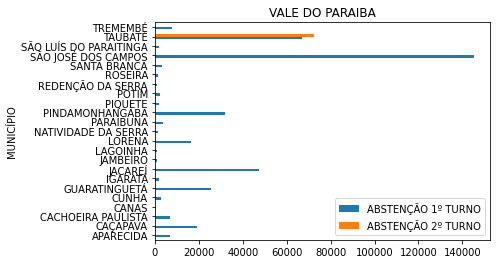

In [122]:
regiao = "VALE DO PARAIBA"
listaCidades = []

for abr_item in abrangencia:
    if abr_item['regiao'] == regiao:
        listaCidades.append(abr_item)

query = createQuery(listaCidades)
generateChart(listaCidades, regiao, "Abstencao_" + regiao.replace(" ", "_"), "bar")

In [121]:
cidade = "APARECIDA"
listaCidades = []

for abr_item in abrangencia:
    if abr_item['cidade'] == cidade:
        listaCidades.append(abr_item)

query = createQuery(listaCidades)
generateChart(listaCidades, cidade, "Abstencao_" + cidade.replace(" ", "_"), "sum")